In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Statystyka

In [3]:
desc = df.describe()
print(desc)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


pairplot (macierz wykresów rozrzutu): pokazuje relacje pomiędzy wszystkimi parami cech i rozdziela punkty według gatunku.

In [4]:
legend = {index : str(iris.target_names[index]) for index in range(3)}
df['species'] = df['species'].map(legend)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


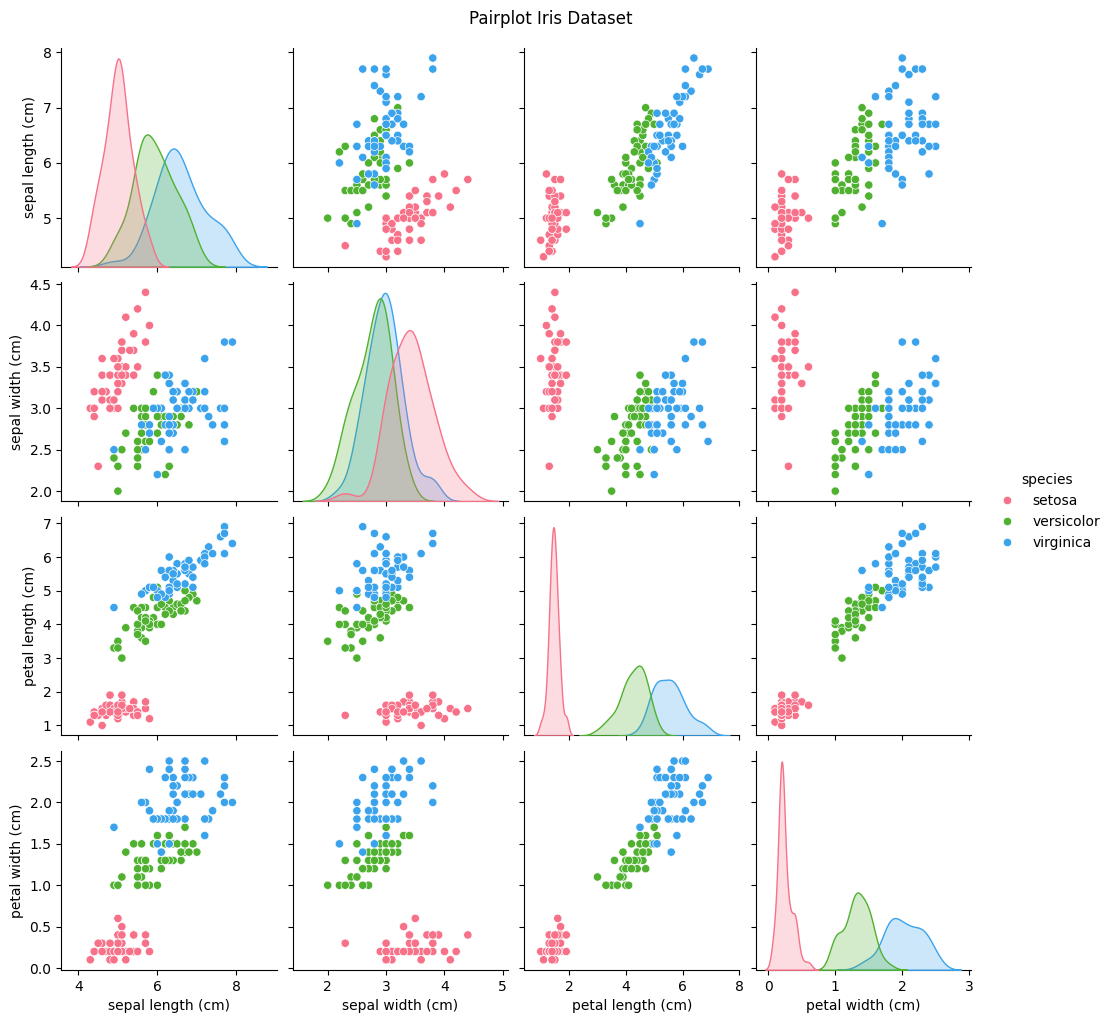

In [5]:
sns.pairplot(df, hue='species', palette='husl')
plt.suptitle('Pairplot Iris Dataset', y=1.02)
plt.show()

Podział na zbiory treningowy i testowy (np. 70/30):

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standaryzacja cech

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k-nearest neighbors

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Predykcja na zbiorze testowym:

In [9]:
y_pred = knn.predict(X_test_scaled)

Macierz pomyłek i raport klasyfikacji

In [10]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cm)
print(cr)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



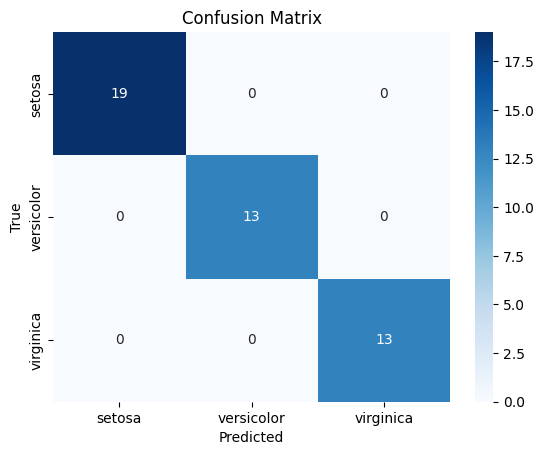

In [11]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 1. Analiza wyników modelu

### **a) Macierz pomyłek (confusion matrix)**
Macierz pomyłek pokazuje, ile przypadków każdej klasy zostało poprawnie lub błędnie sklasyfikowanych. Dzięki niej możesz zobaczyć:
- Czy model myli konkretne klasy (np. versicolor z virginica)?
- Czy któraś klasa jest szczególnie trudna do rozpoznania?

**Interpretacja**:  
Macierz:
```
[[19,  0,  0],
 [ 0, 13,  0],
 [ 0,  0, 13]]
```
oznacza, że wszystkie przypadki zostały poprawnie sklasyfikowane (brak błędów).

### **b) Raport klasyfikacji (classification report)**
Zwraca metryki dla każdej klasy:
- **Precision** (precyzja): Jaki procent przewidzianych jako dana klasa faktycznie do niej należy?
- **Recall** (czułość): Jaki procent rzeczywistych przypadków danej klasy został poprawnie wykryty?
- **F1-score**: Harmoniczna średnia precision i recall, dobry wskaźnik ogólnej jakości.
- **Accuracy**: Ogólny odsetek poprawnych klasyfikacji.

**Wysokie wartości** (np. 1.00) oznaczają bardzo dobry model, ale w praktyce przy innych zbiorach danych mogą pojawić się niższe wyniki.

### **c) Wizualizacja wyników**
Możesz zwizualizować macierz pomyłek, np. za pomocą seaborn:

```python
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
```

---

## 2. Co możesz zrobić dalej? (Kolejne kroki)

### **a) Analiza błędów**
- Jeśli pojawiają się błędy, sprawdź, które przypadki są najczęściej mylone.
- Przeanalizuj, czy są jakieś cechy wspólne dla błędnie klasyfikowanych przykładów.

### **b) Testowanie różnych modeli**
- Spróbuj innych algorytmów: drzewa decyzyjne (`DecisionTreeClassifier`), SVM (`SVC`), regresja logistyczna (`LogisticRegression`).
- Porównaj wyniki różnych modeli.

### **c) Optymalizacja hiperparametrów**
- Zmieniaj parametry modeli (np. liczba sąsiadów w KNN) i sprawdzaj, jak wpływają na wyniki.
- Użyj `GridSearchCV` do automatycznego przeszukiwania najlepszych parametrów.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Najlepsze parametry:", grid.best_params_)
```

### **d) Analiza ważności cech**
- Sprawdź, które cechy są najbardziej istotne dla modelu (np. w drzewach decyzyjnych: `feature_importances_`).
- Możesz wizualizować wpływ poszczególnych cech na klasyfikację.

### **e) Redukcja wymiarów i wizualizacja**
- Użyj PCA (analiza głównych składowych) do redukcji wymiarów i wizualizacji danych w 2D/3D.
- Pozwala to lepiej zrozumieć strukturę danych.

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset')
plt.show()
```

### **f) Walidacja krzyżowa**
- Zastosuj cross-validation (`cross_val_score`) dla bardziej wiarygodnej oceny modelu.

### **g) Praca z innymi zbiorami danych**
- Po opanowaniu Iris, spróbuj pracy z bardziej złożonymi danymi (np. z biologii molekularnej, genetyki, ekspresji genów).

---

## **Podsumowanie**
Analiza wyników to nie tylko sprawdzenie accuracy, ale także:
- Zrozumienie, gdzie model popełnia błędy,
- Porównanie różnych podejść,
- Uczenie się na podstawie błędów i iteracyjne ulepszanie modeli.